# Corona Stats

In this hub, i want to try to analyse the statistics about corona and find out, where the different countries are in their infections.

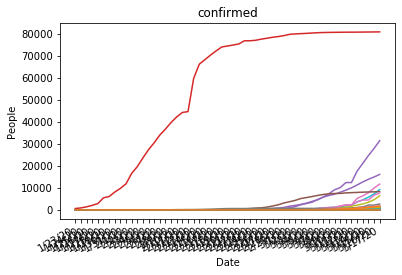

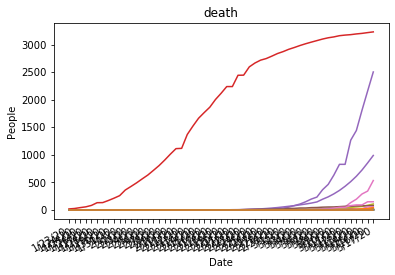

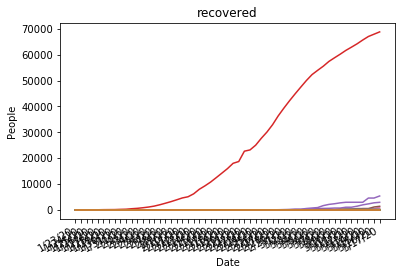

In [1]:
confirmedLink = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
deathLink = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recoveredLink = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

%matplotlib inline

import matplotlib.pyplot as plt
import requests
from io import StringIO
import csv
import itertools

confirmedString = requests.get(confirmedLink).text
deathString = requests.get(deathLink).text
recoveredString = requests.get(recoveredLink).text

confirmedReader = csv.DictReader((StringIO(confirmedString)))
deathReader = csv.DictReader((StringIO(deathString)))
recoveredReader = csv.DictReader((StringIO(recoveredString)))

def addList(list1, list2):
    list3 = []

    for i in range(len(list1)):
        list3.append(int(list1[i]) + int(list2[i]))

    return list3

def subtractList(list1, list2):
    list3 = []

    for i in range(len(list1)):
        list3.append(int(list1[i]) - int(list2[i]))

    return list3


def addReader(dictionary, reader):
    for row in reader:
        try:
            dictionary[list(row.values())[1]] = addList(dictionary[list(row.values())[1]], list(row.values())[5:])
        except:
            dictionary[list(row.values())[1]] = list(row.values())[5:]

confirmed = {}
death = {}
recovered = {}

addReader(confirmed, confirmedReader)
addReader(death, deathReader)
addReader(recovered, recoveredReader)
        
for row in deathReader:    
    confirmed[list(row.values())[1]] = subtractList(confirmed[list(row.values())[1]], list(row.values())[5:])
        
for row in recoveredReader:    
    confirmed[list(row.values())[1]] = subtractList(confirmed[list(row.values())[1]], list(row.values())[5:])

keys = confirmedReader.fieldnames[5:]

def plot(dictionary, title):


    plt.figure()
    values = {}
    for key, value in dictionary.items():
        values[key] = [float(val) for val in value]

    for key, value in values.items():
        plt.plot(keys, value, label=str(key))

    plt.title(title)
    plt.ylabel("People")
    plt.xlabel("Date")
    plt.gcf().autofmt_xdate()
    #leg = plt.legend(ncol=3, mode="expand", shadow=True, fancybox=True, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #leg.get_frame().set_alpha(0.5)

    #plt.show()

plot(confirmed, "confirmed")
plot(death, "death")
plot(recovered, "recovered")


# An overview over all confirmed patients
confirmed patient := confirmed - death - recovered

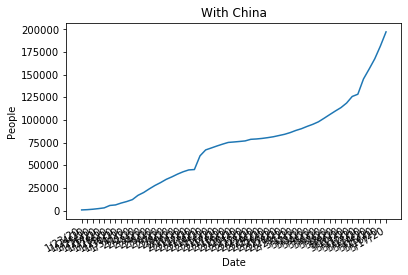

In [2]:
overallConfirmed = [0 for k in keys]

for key, values in confirmed.items():
    for index, value in enumerate(values):
        overallConfirmed[index] += int(value) 

plt.figure()
plt.title("With China")
plt.ylabel("People")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
#leg = plt.legend(ncol=3, mode="expand", shadow=True, fancybox=True, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg.get_frame().set_alpha(0.5)

plt.plot(keys, overallConfirmed)




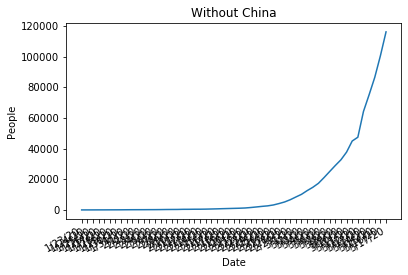

In [3]:
confirmed2 = confirmed.copy()
del confirmed2["China"]

overallConfirmed = [0 for k in keys]

for key, values in confirmed2.items():
    for index, value in enumerate(values):
        overallConfirmed[index] += int(value) 

plt.figure()
plt.title("Without China")
plt.ylabel("People")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
#leg = plt.legend(ncol=3, mode="expand", shadow=True, fancybox=True, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#leg.get_frame().set_alpha(0.5)

plt.plot(keys, overallConfirmed)




# Death and Recovered

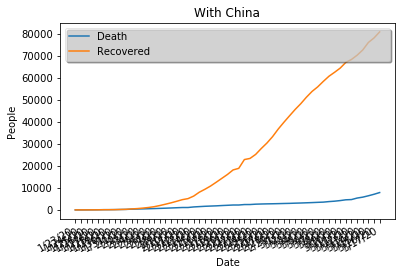

In [8]:
overallDeath = [0 for k in keys]
overallRecovered = [0 for k in keys]

for key, values in death.items():
    for index, value in enumerate(values):
        overallDeath[index] += int(value) 

for key, values in recovered.items():
    for index, value in enumerate(values):
        overallRecovered[index] += int(value) 

plt.figure()
plt.title("With China")
plt.ylabel("People")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()

plt.plot(keys, overallDeath, label="Death")
plt.plot(keys, overallRecovered, label="Recovered")

leg = plt.legend(ncol=1, mode="expand", shadow=True, fancybox=True, loc='upper left')
leg.get_frame().set_alpha(0.5)


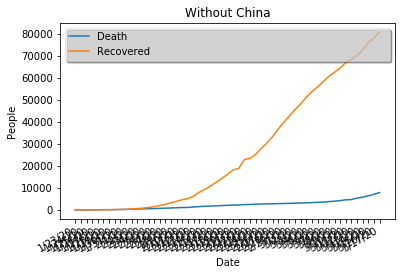

In [9]:
overallDeath = [0 for k in keys]
overallRecovered = [0 for k in keys]

death2 = death.copy()
recovered2 = recovered.copy()

del death2["China"]
del recovered2["China"]

for key, values in death.items():
    for index, value in enumerate(values):
        overallDeath[index] += int(value) 

for key, values in recovered.items():
    for index, value in enumerate(values):
        overallRecovered[index] += int(value) 

plt.figure()
plt.title("Without China")
plt.ylabel("People")
plt.xlabel("Date")
plt.gcf().autofmt_xdate()

plt.plot(keys, overallDeath, label="Death")
plt.plot(keys, overallRecovered, label="Recovered")


leg = plt.legend(ncol=1, mode="expand", shadow=True, fancybox=True, loc='upper left')
leg.get_frame().set_alpha(0.5)


